In [1]:
import pandas as pd
weather_data_path = '../Datasets/boston_weather_data.csv'
animal_cases_path = '../Datasets/animal_cases.csv'

weather_data = pd.read_csv(weather_data_path)
animal_cases_data = pd.read_csv(animal_cases_path)

# Display the first few rows and the information about both dataframes
weather_data_info = weather_data.info()
weather_data_head = weather_data.head()
animal_cases_info = animal_cases_data.info()
animal_cases_head = animal_cases_data.head()

(weather_data_info, weather_data_head, animal_cases_info, animal_cases_head)


/var/folders/k2/05jyffc934vg5tpqj7xk80mw0000gn/T/ipykernel_38469/2653474559.py:6: DtypeWarning: Columns (13,16,18,21) have mixed types. Specify dtype option on import or set low_memory=False.
  animal_cases_data = pd.read_csv(animal_cases_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3653 entries, 0 to 3652
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    3653 non-null   object 
 1   tavg    3652 non-null   float64
 2   tmin    3653 non-null   float64
 3   tmax    3653 non-null   float64
 4   prcp    3653 non-null   float64
 5   wdir    3066 non-null   float64
 6   wspd    3653 non-null   float64
 7   pres    3492 non-null   float64
dtypes: float64(7), object(1)
memory usage: 228.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83281 entries, 0 to 83280
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   case_enquiry_id                 83281 non-null  int64  
 1   open_dt                         83281 non-null  object 
 2   sla_target_dt                   48573 non-null  object 
 3   closed_dt                       62848 non-null  obj

(None,
          time  tavg  tmin  tmax  prcp   wdir  wspd    pres
 0  2013-03-01   3.2   1.1   5.0   0.0  342.0  15.1  1002.7
 1  2013-03-02   3.1   1.1   5.6   0.0  307.0  14.4  1004.2
 2  2013-03-03   2.6   0.6   6.1   0.0    NaN  14.4  1002.6
 3  2013-03-04   1.8  -0.6   5.0   0.0  303.0  28.1  1003.0
 4  2013-03-05   2.9   0.0   6.1   0.0    NaN  16.6  1013.5,
 None,
    case_enquiry_id              open_dt        sla_target_dt  \
 0     101000295622  2011-07-01 02:44:50  2011-07-04 02:44:49   
 1     101000295636  2011-07-01 03:44:54  2011-07-04 03:44:53   
 2     101000295715  2011-07-01 04:40:53  2011-07-04 04:40:53   
 3     101000295859  2011-07-01 06:51:01  2011-07-04 06:51:00   
 4     101000295903  2011-07-01 07:46:49  2011-07-04 07:46:45   
 
              closed_dt on_time case_status  \
 0  2011-07-01 02:44:55  ONTIME      Closed   
 1  2011-07-01 05:19:44  ONTIME      Closed   
 2  2011-07-01 05:18:50  ONTIME      Closed   
 3  2011-07-01 06:51:08  ONTIME      Closed  

In [2]:
weather_data['date'] = pd.to_datetime(weather_data['time']).dt.date
animal_cases_data['date'] = pd.to_datetime(animal_cases_data['open_dt']).dt.date

combined_data = pd.merge(animal_cases_data, weather_data, on='date', how='inner')

combined_data['case_count'] = combined_data.groupby('date')['case_enquiry_id'].transform('count')

combined_data_head = combined_data.head()
combined_data_info = combined_data.info()

combined_data_info, combined_data_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69156 entries, 0 to 69155
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   case_enquiry_id                 69156 non-null  int64  
 1   open_dt                         69156 non-null  object 
 2   sla_target_dt                   38495 non-null  object 
 3   closed_dt                       49578 non-null  object 
 4   on_time                         69156 non-null  object 
 5   case_status                     69156 non-null  object 
 6   closure_reason                  69156 non-null  object 
 7   case_title                      69156 non-null  object 
 8   subject                         69156 non-null  object 
 9   reason                          69156 non-null  object 
 10  type                            69156 non-null  object 
 11  queue                           69156 non-null  object 
 12  department                      

(None,
    case_enquiry_id              open_dt        sla_target_dt  \
 0     101000793992  2013-03-01 04:48:59  2013-03-04 04:48:59   
 1     101000794025  2013-03-01 05:03:27  2013-03-04 05:03:27   
 2     101000794113  2013-03-01 05:58:57  2013-03-04 05:58:51   
 3     101000794215  2013-03-01 07:06:19  2013-03-04 07:05:00   
 4     101000794216  2013-03-01 07:07:20  2013-03-04 07:06:00   
 
              closed_dt on_time case_status  \
 0  2013-03-01 05:30:49  ONTIME      Closed   
 1  2013-03-01 05:28:26  ONTIME      Closed   
 2  2013-03-01 08:51:25  ONTIME      Closed   
 3  2013-03-01 07:06:40  ONTIME      Closed   
 4  2013-03-01 07:07:33  ONTIME      Closed   
 
                                       closure_reason           case_title  \
 0                         Case Closed Case Resolved   Pick up Dead Animal   
 1                         Case Closed Case Resolved   Pick up Dead Animal   
 2  Case Closed Case Noted  at site on 3/1/13 at 1...  Pick up Dead Animal   
 3   

In [4]:
combined_data['date'] = pd.to_datetime(combined_data['date'])
combined_data['month'] = combined_data['date'].dt.month

unique_months = combined_data['month'].unique()
data_head = combined_data.head()

unique_months, data_head

(array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12,  1,  2], dtype=int32),
    case_enquiry_id              open_dt        sla_target_dt  \
 0     101000793992  2013-03-01 04:48:59  2013-03-04 04:48:59   
 1     101000794025  2013-03-01 05:03:27  2013-03-04 05:03:27   
 2     101000794113  2013-03-01 05:58:57  2013-03-04 05:58:51   
 3     101000794215  2013-03-01 07:06:19  2013-03-04 07:05:00   
 4     101000794216  2013-03-01 07:07:20  2013-03-04 07:06:00   
 
              closed_dt on_time case_status  \
 0  2013-03-01 05:30:49  ONTIME      Closed   
 1  2013-03-01 05:28:26  ONTIME      Closed   
 2  2013-03-01 08:51:25  ONTIME      Closed   
 3  2013-03-01 07:06:40  ONTIME      Closed   
 4  2013-03-01 07:07:33  ONTIME      Closed   
 
                                       closure_reason           case_title  \
 0                         Case Closed Case Resolved   Pick up Dead Animal   
 1                         Case Closed Case Resolved   Pick up Dead Animal   
 2  Case Closed Cas

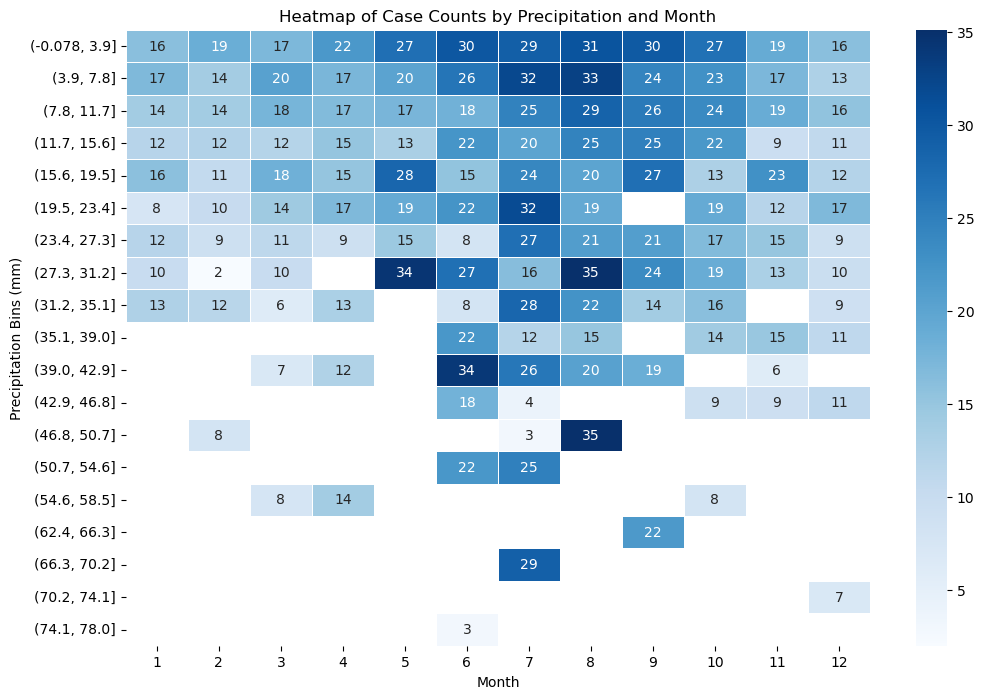

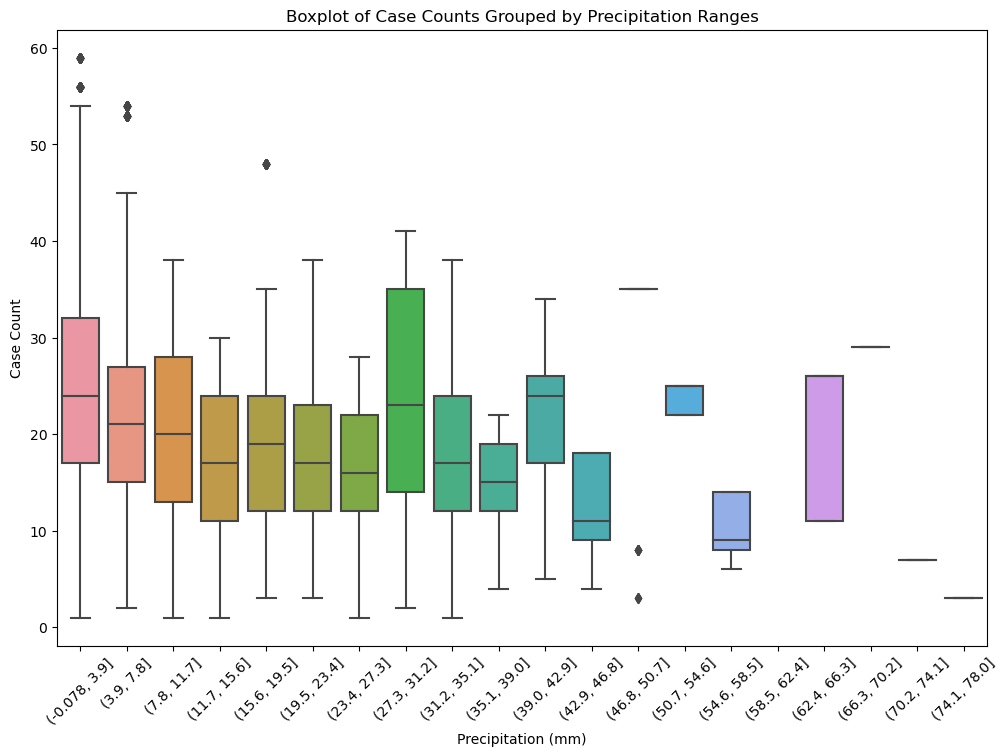

In [5]:
import matplotlib.pyplot as plt 
import seaborn as sns
combined_data['precip_bins_fine'] = pd.cut(combined_data['prcp'], bins=20) 
combined_data['wind_speed_bins_fine'] = pd.cut(combined_data['wspd'], bins=20) 
combined_data['pressure_bins_fine'] = pd.cut(combined_data['pres'], bins=20) 

pivot_precip_fine = combined_data.pivot_table(index='precip_bins_fine', columns='month', values='case_count', aggfunc='mean')
pivot_wind_fine = combined_data.pivot_table(index='wind_speed_bins_fine', columns='month', values='case_count', aggfunc='mean')
pivot_pressure_fine = combined_data.pivot_table(index='pressure_bins_fine', columns='month', values='case_count', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_precip_fine, cmap='Blues', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Case Counts by Precipitation and Month')
plt.xlabel('Month')
plt.ylabel('Precipitation Bins (mm)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='precip_bins_fine', y='case_count', data=combined_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Case Counts Grouped by Precipitation Ranges')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Case Count')
plt.show()


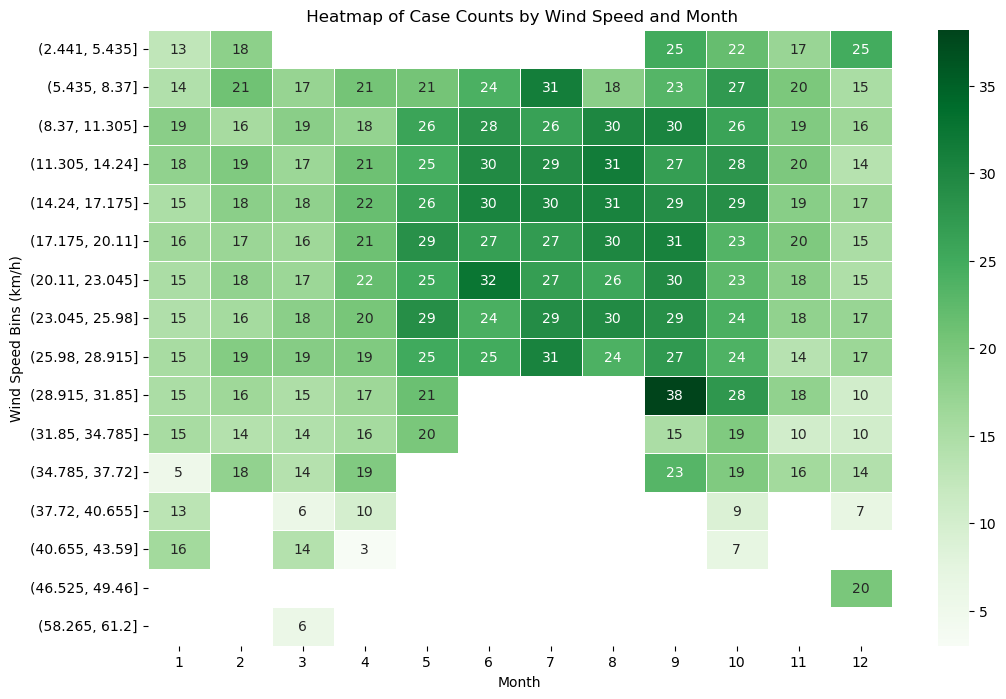

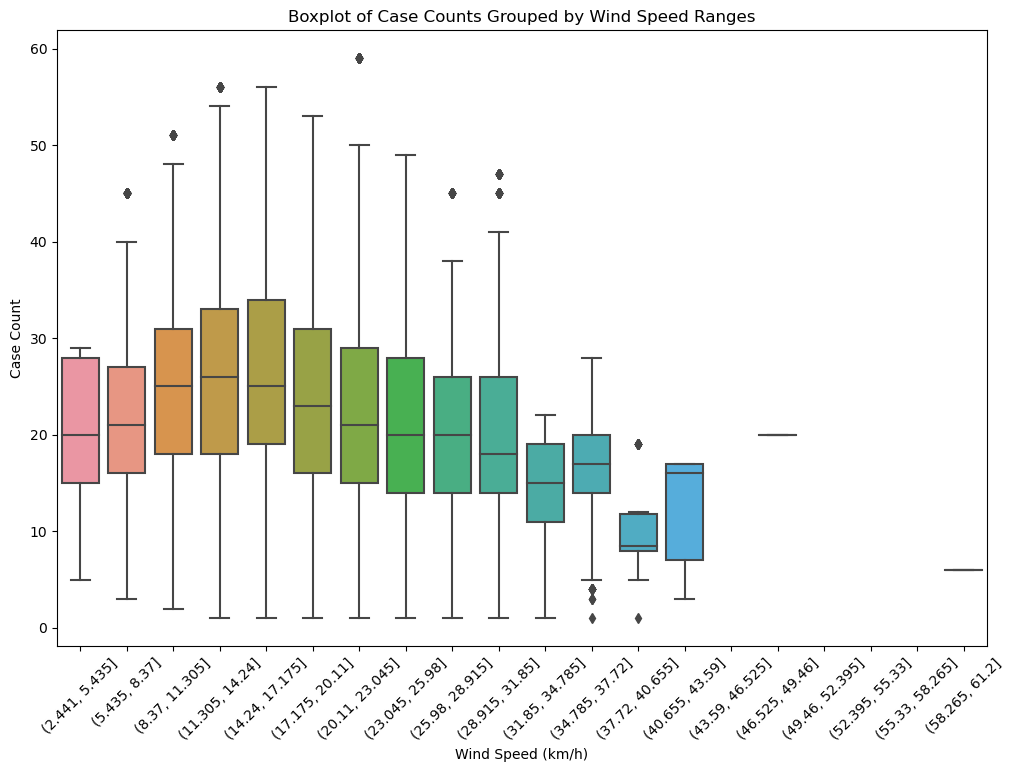

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_wind_fine, cmap='Greens', annot=True, fmt=".0f", linewidths=.5)
plt.title(' Heatmap of Case Counts by Wind Speed and Month')
plt.xlabel('Month')
plt.ylabel('Wind Speed Bins (km/h)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='wind_speed_bins_fine', y='case_count', data=combined_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Case Counts Grouped by Wind Speed Ranges')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Case Count')
plt.show()


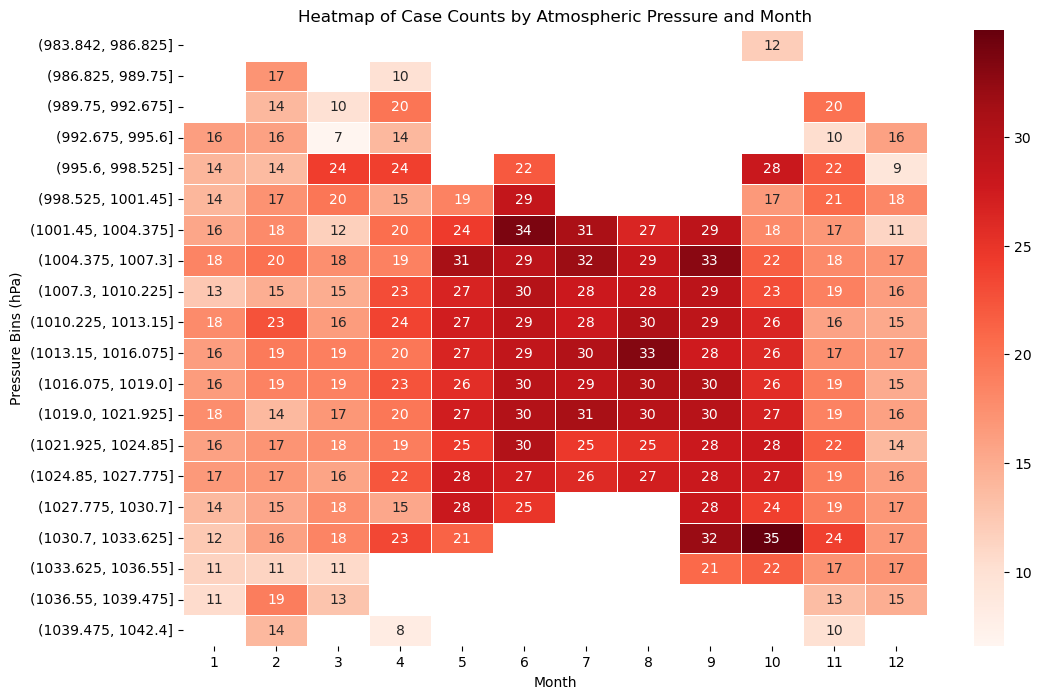

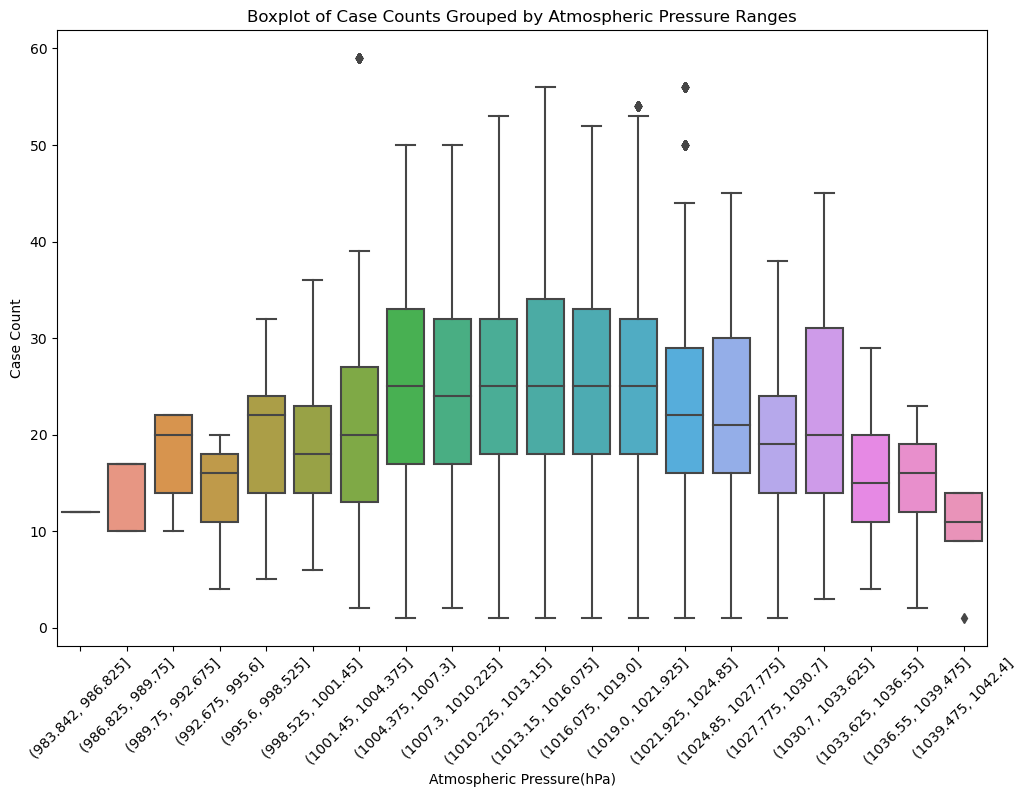

In [7]:

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_pressure_fine, cmap='Reds', annot=True, fmt=".0f", linewidths=.5)
plt.title('Heatmap of Case Counts by Atmospheric Pressure and Month')
plt.xlabel('Month')
plt.ylabel('Pressure Bins (hPa)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='pressure_bins_fine', y='case_count', data=combined_data)
plt.xticks(rotation=45)
plt.title('Boxplot of Case Counts Grouped by Atmospheric Pressure Ranges')
plt.xlabel('Atmospheric Pressure(hPa)')
plt.ylabel('Case Count')
plt.show()